<a href="https://colab.research.google.com/github/Muthon1/DataScience/blob/main/Machine_Learning_Algorithms_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Load data
df=pd.read_csv("/content/drive/MyDrive/Checkpoint Assignments/Microsoft_malware_dataset_min.csv")

In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [11]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Dataset Profiling Report")
profile.to_notebook_iframe()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f3f9481fbe2014136efc8d32e9290a2562d0dda096579546a8c4460fe6469000
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
(f"Dataset shape: {df.shape}")

'Dataset shape: (100000, 10)'

In [ ]:
df.isnull().sum()

,0
HasDetections,0
Wdft_IsGamer,3415
Census_IsVirtualDevice,185
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,1076
SMode,5932
IsProtected,391
OsPlatformSubRelease,0
CountryIdentifier,0


In [13]:
# replacing null values
from sklearn.impute import SimpleImputer

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Use mean or median to impute missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [14]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Use 'most_frequent' strategy to impute missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [15]:
df.isnull().sum()

,0
HasDetections,0
Wdft_IsGamer,0
Census_IsVirtualDevice,0
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,0
SMode,0
IsProtected,0
OsPlatformSubRelease,0
CountryIdentifier,0


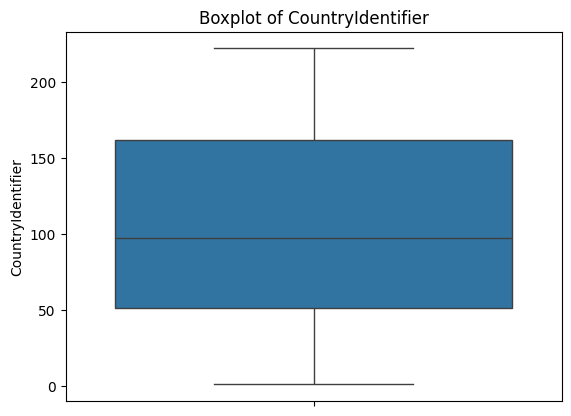

In [16]:
# Detect outliers using boxplot
sns.boxplot(data=df['CountryIdentifier'])
plt.title('Boxplot of CountryIdentifier')
plt.show()


In [19]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(df, columns=['Census_OSEdition'])


In [26]:
# Split into features and target
X = df.drop('CountryIdentifier', axis=1)
y = df['CountryIdentifier']


In [29]:
# Create a LabelEncoder object
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features in X
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Replace categorical columns with encoded columns in X
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Now proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [28]:
# Train a Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)

# Inverse transform y_pred to original labels if needed for classification_report
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)


print(classification_report(y_test_original, y_pred_original))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00       143
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00        24
         7.0       0.00      0.00      0.00        40
         8.0       0.00      0.00      0.00        27
         9.0       0.04      0.02      0.03       367
        11.0       0.04      0.01      0.01       129
        12.0       0.04      0.01      0.01       174
        13.0       0.00      0.00      0.00         5
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00        18
        16.0       0.00      0.00      0.00        32
        17.0       0.00      0.00      0.00        11
        18.0       0.06      0.01      0.02       139
        19.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-pack

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 633, in roc_

In [32]:
# Drop out the target variable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_unsupervised = df.drop('CountryIdentifier', axis=1)

# Identify categorical features
categorical_cols = X_unsupervised.select_dtypes(include=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for compatibility with StandardScaler
encoded_data = encoder.fit_transform(X_unsupervised[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Replace categorical columns with encoded columns in X_unsupervised
X_unsupervised = X_unsupervised.drop(categorical_cols, axis=1)
X_unsupervised = pd.concat([X_unsupervised, encoded_df], axis=1)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


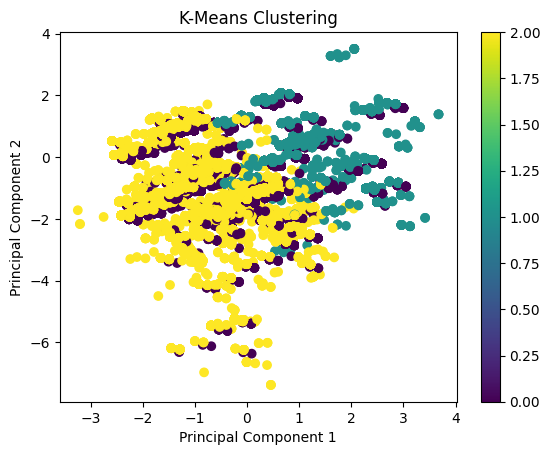

In [34]:
# Apply K means clustering and plot the clusters
# Use PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.colorbar()
plt.show()


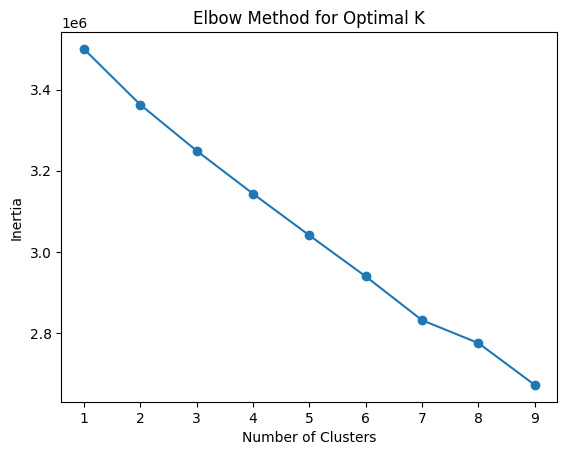

K=2, Silhouette Score=0.11
K=3, Silhouette Score=0.13
K=4, Silhouette Score=0.16
K=5, Silhouette Score=0.18
K=6, Silhouette Score=0.19
K=7, Silhouette Score=0.22
K=8, Silhouette Score=0.19
K=9, Silhouette Score=0.20


In [35]:
# Find the optimal K parameter
# Elbow method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Silhouette score
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.2f}")


In [36]:
# Interpret the results
for cluster in df['Cluster'].unique():
    print(f"Cluster {cluster} Stats:\n", df[df['Cluster'] == cluster].describe())


Cluster 1 Stats:
        HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  \
count   40611.000000  40611.000000            40611.000000   
mean        0.519490      0.352885                0.008391   
std         0.499626      0.466522                0.091116   
min         0.000000      0.000000                0.000000   
25%         0.000000      0.000000                0.000000   
50%         1.000000      0.000000                0.000000   
75%         1.000000      1.000000                0.000000   
max         1.000000      1.000000                1.000000   

       Census_HasOpticalDiskDrive      Firewall         SMode   IsProtected  \
count                     40611.0  40611.000000  40611.000000  40611.000000   
mean                          0.0      0.975174      0.000826      0.977636   
std                           0.0      0.155503      0.028494      0.147770   
min                           0.0      0.000000      0.000000      0.000000   
25%                         